<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Read the CSV file
df = pd.read_csv('../module3/survey_data_final_m3.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,WorkedWith_Python,WorkedWith_JavaScript,WorkedWith_R,WorkedWith_TypeScript,WorkedWith_Lua,WorkedWith_HTML/CSS,WorkedWith_Kotlin,WorkedWith_C++,WorkedWith_PowerShell,Age_numeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time",No,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",No,Apples,NaN,Secondary school,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,21.0


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [6]:
# your code goes here
## Write your code here
#removing the filled data 
df_comp_total = df[df['CompTotal'] != 110000.0]
max_comp = df_comp_total['CompTotal'].max()
print(f"The maximum compensation is: {max_comp}")
print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] > 1000000].index, inplace=True))
# lets remove the outlier
q1 = df_comp_total['CompTotal'].quantile(0.25)
q3 = df_comp_total['CompTotal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_comp_total[(df_comp_total['CompTotal'] < lower_bound) | (df_comp_total['CompTotal'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")



The maximum compensation is: 1.0000000000000002e+150
None
Number of outliers: 3242


C:\Users\akar\AppData\Local\Temp\ipykernel_25584\910041390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] > 1000000].index, inplace=True))


In [7]:
#dropping outliers
df_comp_total.drop(outliers.index, inplace=True)
max_comp = df_comp_total['CompTotal'].max()
print(f"The maximum compensation is: {max_comp}")

The maximum compensation is: 331348.0


C:\Users\akar\AppData\Local\Temp\ipykernel_25584\2149973689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_total.drop(outliers.index, inplace=True)


In [8]:
max_comp = df_comp_total['CompTotal'].max()
print(f"The maximum compensation is: {max_comp}")
print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] > 1000000].index, inplace=True))
# lets remove the outlier
q1 = df_comp_total['CompTotal'].quantile(0.25)
q3 = df_comp_total['CompTotal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_comp_total[(df_comp_total['CompTotal'] < lower_bound) | (df_comp_total['CompTotal'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

The maximum compensation is: 331348.0
None
Number of outliers: 600


C:\Users\akar\AppData\Local\Temp\ipykernel_25584\2965560259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(df_comp_total.drop(df_comp_total[df_comp_total['CompTotal'] > 1000000].index, inplace=True))


<Axes: xlabel='CompTotal'>

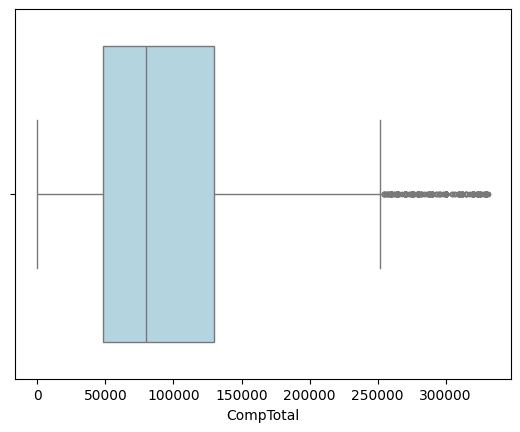

In [4]:
sns.boxplot(data=df_comp_total, x='CompTotal', color='lightblue', fliersize=3, linewidth=1)

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


<Axes: xlabel='Age_numeric'>

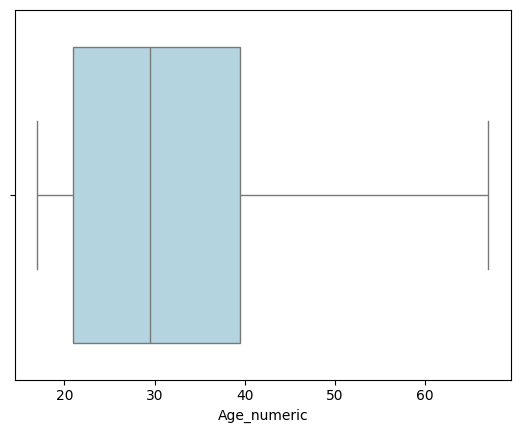

In [9]:
# your code goes here
sns.boxplot(data=df, x='Age_numeric', color='lightblue', fliersize=3, linewidth=1)

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


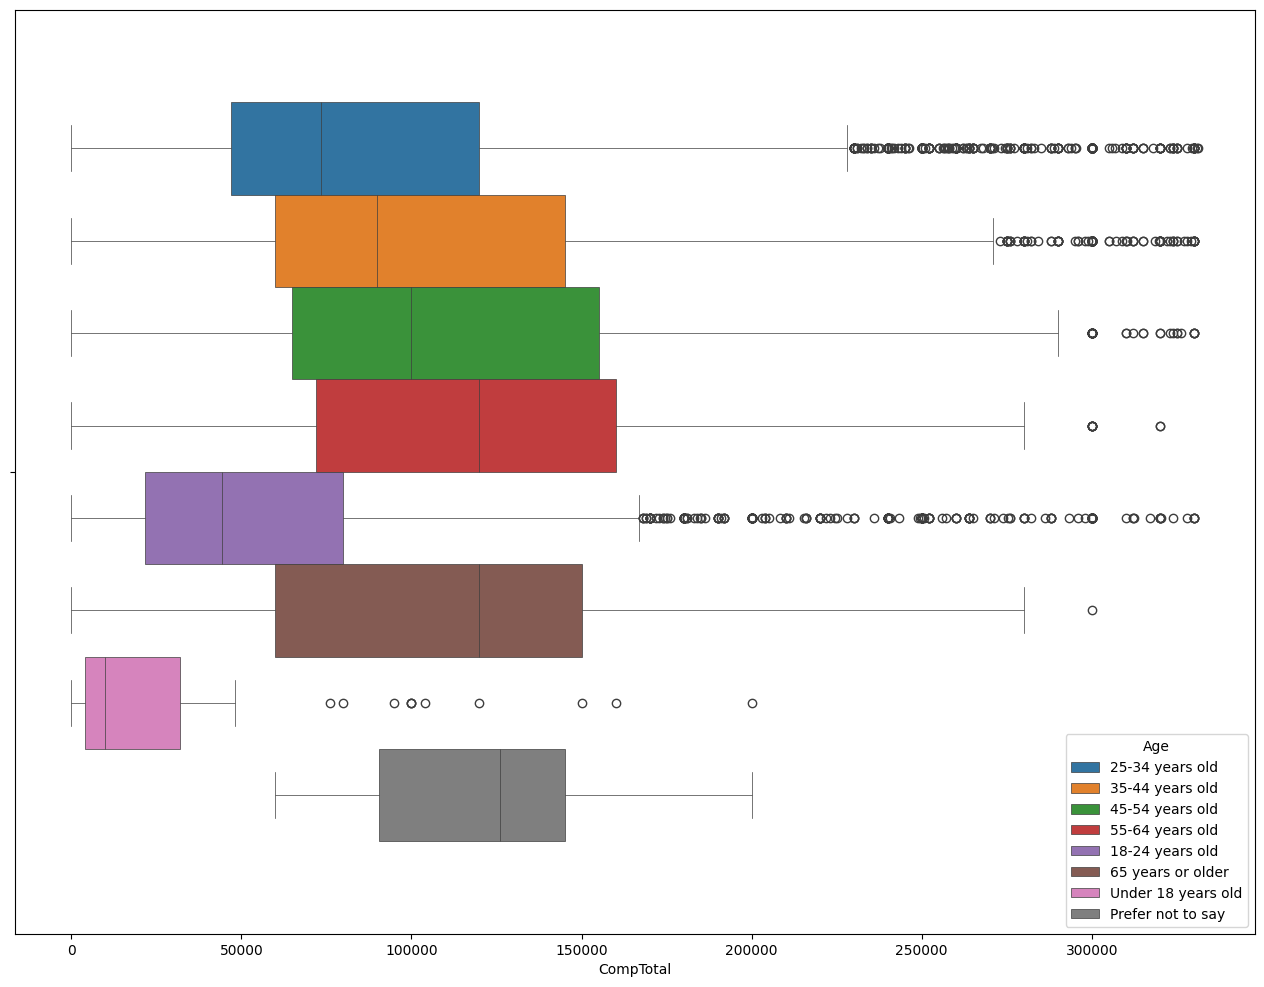

In [22]:
# your code goes here
plt.figure(figsize=(16, 12))
sns.boxplot(data=df_comp_total, x='CompTotal', linewidth=0.5, hue='Age')
plt.subplots_adjust(wspace=1.5)

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Axes: title={'center': 'Job Satisfaction Points (6) Box Plot'}>

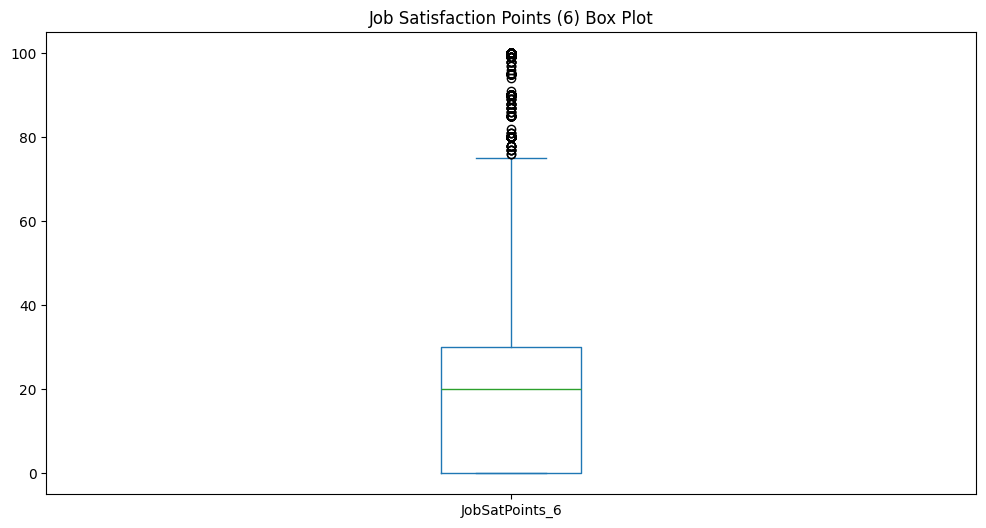

In [29]:
df['JobSatPoints_6'].plot(kind='box', figsize=(12, 6), title='Job Satisfaction Points (6) Box Plot')

<Axes: ylabel='CompTotal'>

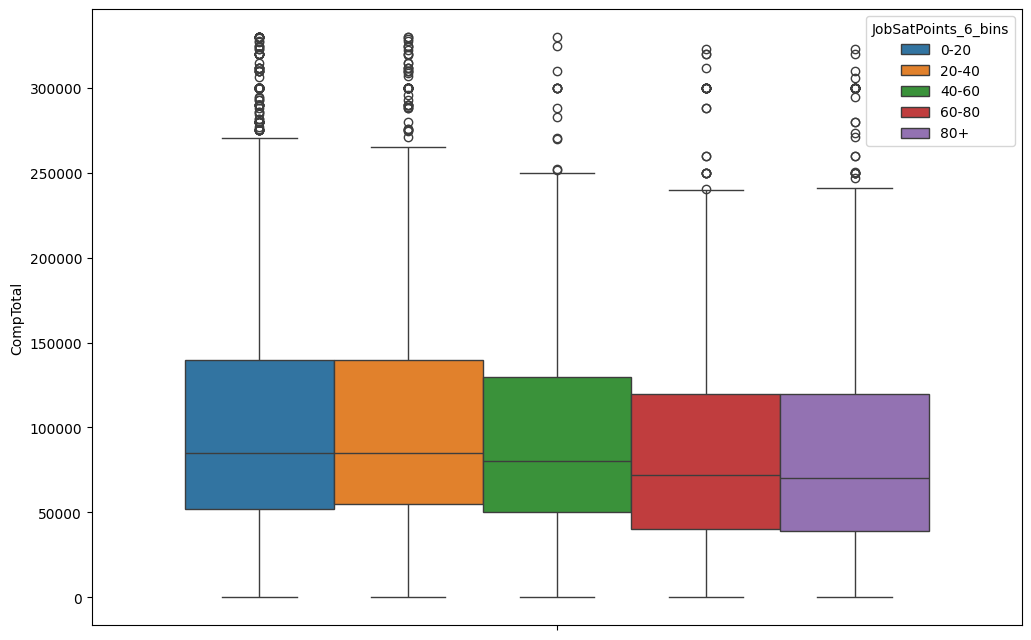

In [34]:
# your code goes here
df_job_sat_6 = df_comp_total[['CompTotal', 'JobSatPoints_6']].copy()
df_job_sat_6['JobSatPoints_6_bins'] = pd.cut(df_job_sat_6['JobSatPoints_6'], bins=[0, 20, 40, 60, 80, float('inf')], labels=['0-20', '20-40', '40-60', '60-80', '80+'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_job_sat_6, hue='JobSatPoints_6_bins', y='CompTotal')

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [48]:
# your code goes here
df_top5_devtype = df[df['DevType'].str.contains('|'.join(df['DevType'].value_counts().index[i] for i in range(5)), na=False, regex=True)]
df_top5_devtype['DevType'].value_counts()

DevType
Developer, full-stack                            17763
Developer, back-end                               9516
Student                                           5001
Developer, front-end                              3281
Developer, desktop or enterprise applications     2425
Name: count, dtype: int64

<Axes: xlabel='ConvertedCompYearly'>

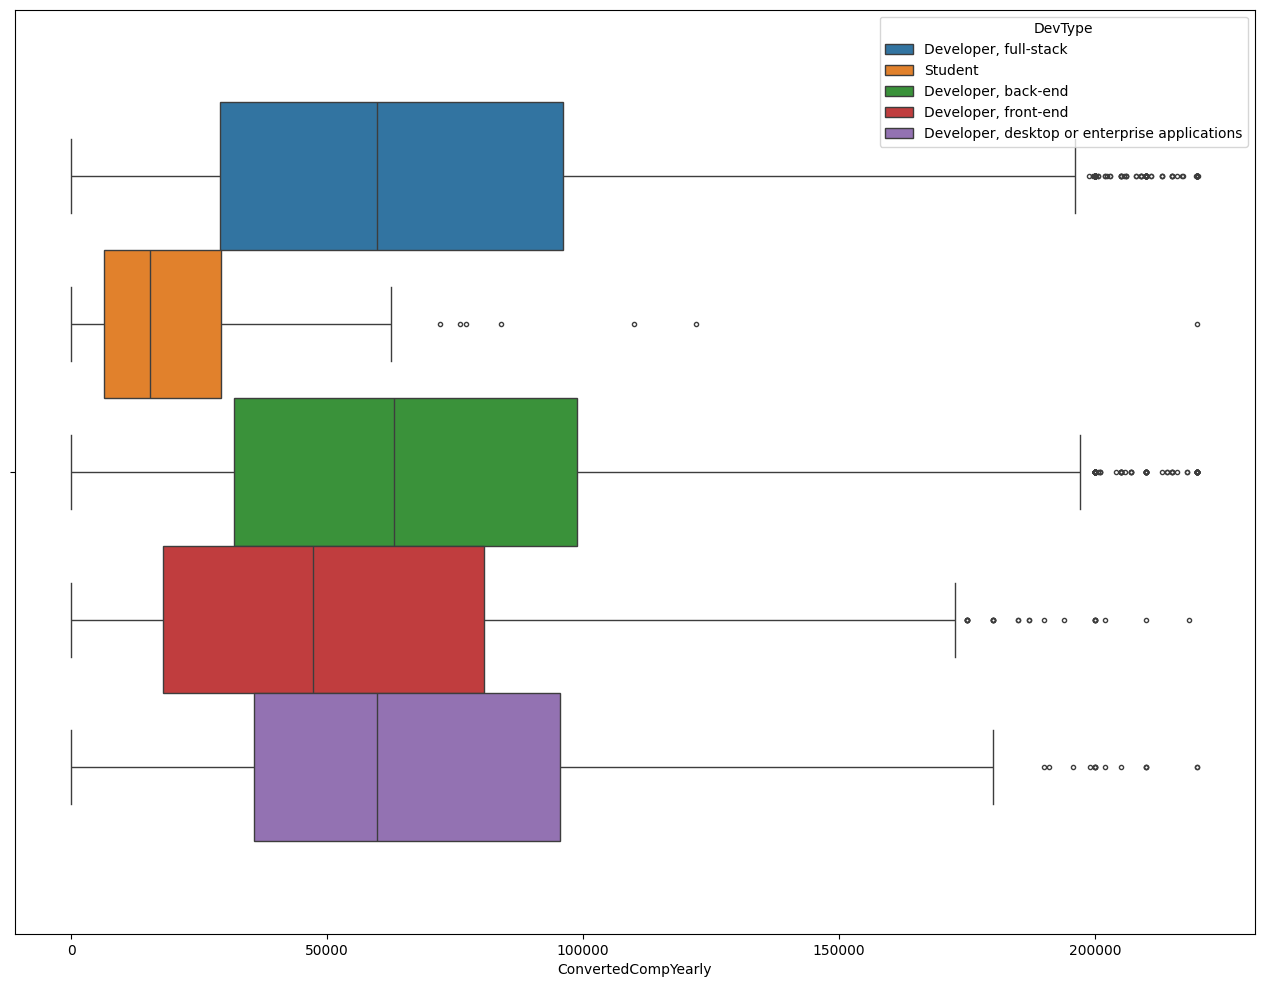

In [51]:
plt.figure(figsize=(16, 12))
sns.boxplot(data=df_top5_devtype, x='ConvertedCompYearly', hue='DevType', fliersize=3, linewidth=1)

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [52]:
# your code goes here
print(f"The top 5 countries are first 5 of this list: {df['Country'].value_counts()}")
df_top5_countries = df[df['Country'].str.contains('|'.join(df['Country'].value_counts().index[i] for i in range(5)), na=False, regex=True)]
print('Lets see the lsit again:')
df_top5_countries['Country'].value_counts()


The top 5 countries are first 5 of this list: Country
United States of America    10312
Germany                      4828
India                        4145
United Kingdom               3124
Ukraine                      2639
                            ...  
Saint Kitts and Nevis           1
Nauru                           1
Chad                            1
Djibouti                        1
Solomon Islands                 1
Name: count, Length: 181, dtype: int64
Lets see the lsit again:


Country
United States of America    10312
Germany                      4828
India                        4145
United Kingdom               3124
Ukraine                      2639
Name: count, dtype: int64

<Axes: xlabel='ConvertedCompYearly'>

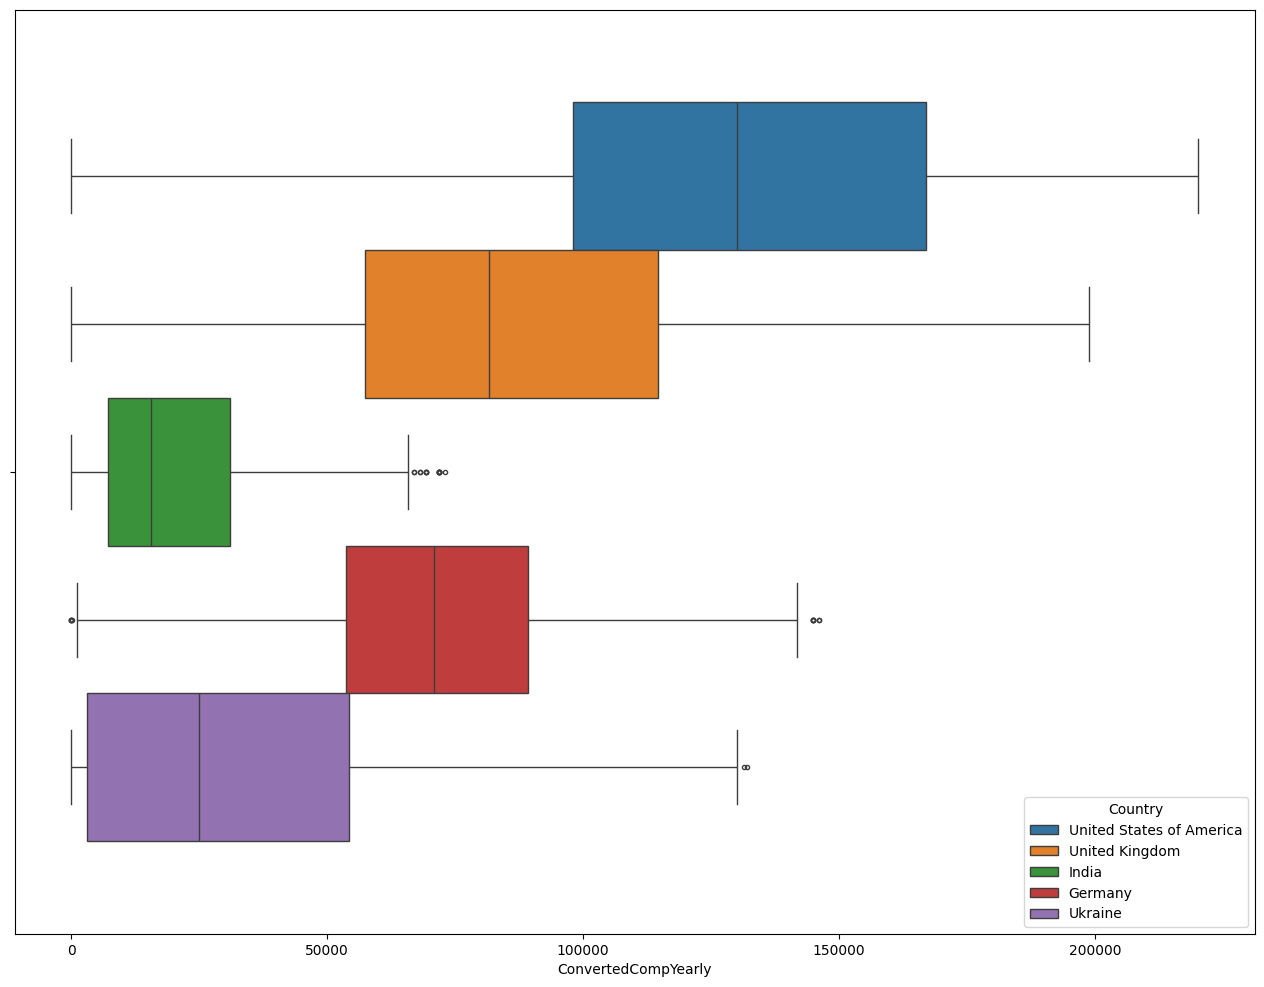

In [53]:
plt.figure(figsize=(16, 12))
sns.boxplot(data=df_top5_countries, x='ConvertedCompYearly', hue='Country', fliersize=3, linewidth=1)

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [55]:
unique_values_in_employment = df['Employment'].unique()
unique_items = set(x for i in unique_values_in_employment for x in str(i).split(';'))
unique_items

{'Employed, full-time',
 'Employed, part-time',
 'Independent contractor, freelancer, or self-employed',
 'Not employed, and not looking for work',
 'Not employed, but looking for work',
 'Retired',
 'Student, full-time',
 'Student, part-time'}

C:\Users\akar\AppData\Local\Temp\ipykernel_25584\827219110.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data, labels=labels, patch_artist=True, flierprops=dict(markersize=3), vert=False)


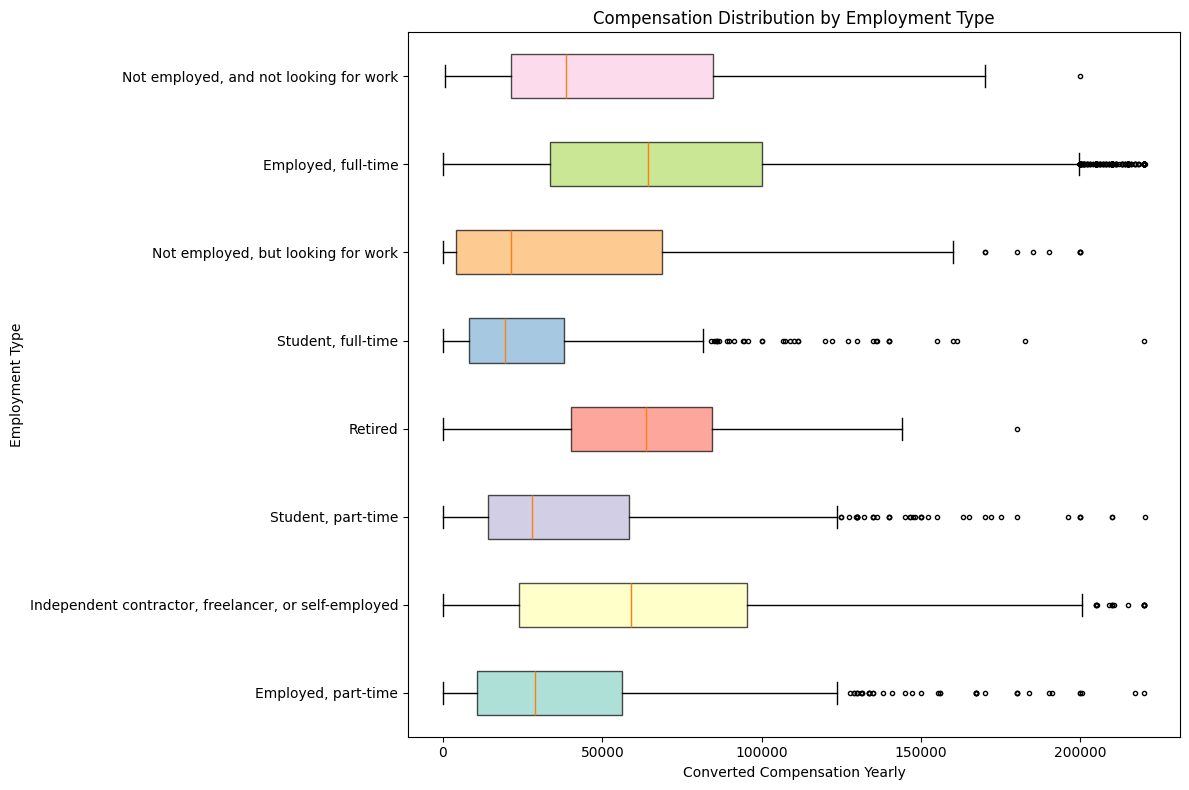

In [75]:
plt.figure(figsize=(12, 8))

# Create a color palette for the different employment types
colors = sns.color_palette("Set3", len(unique_items))
color_map = dict(zip(unique_items, colors))

# Create box plots for each employment type on the same axes
box_data = []
labels = []

for item in unique_items:
    filtered_data = df[df['Employment'].str.contains(item, na=False)]
    if not filtered_data.empty and not filtered_data['ConvertedCompYearly'].isna().all():
        box_data.append(filtered_data['ConvertedCompYearly'].dropna())
        labels.append(item)

# Create the horizontal box plot
bp = plt.boxplot(box_data, labels=labels, patch_artist=True, flierprops=dict(markersize=3), vert=False)

# Apply colors to each box
for patch, label in zip(bp['boxes'], labels):
    patch.set_facecolor(color_map[label])
    patch.set_alpha(0.7)

plt.yticks(rotation=0)
plt.xlabel('Converted Compensation Yearly')
plt.ylabel('Employment Type')
plt.title('Compensation Distribution by Employment Type')
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


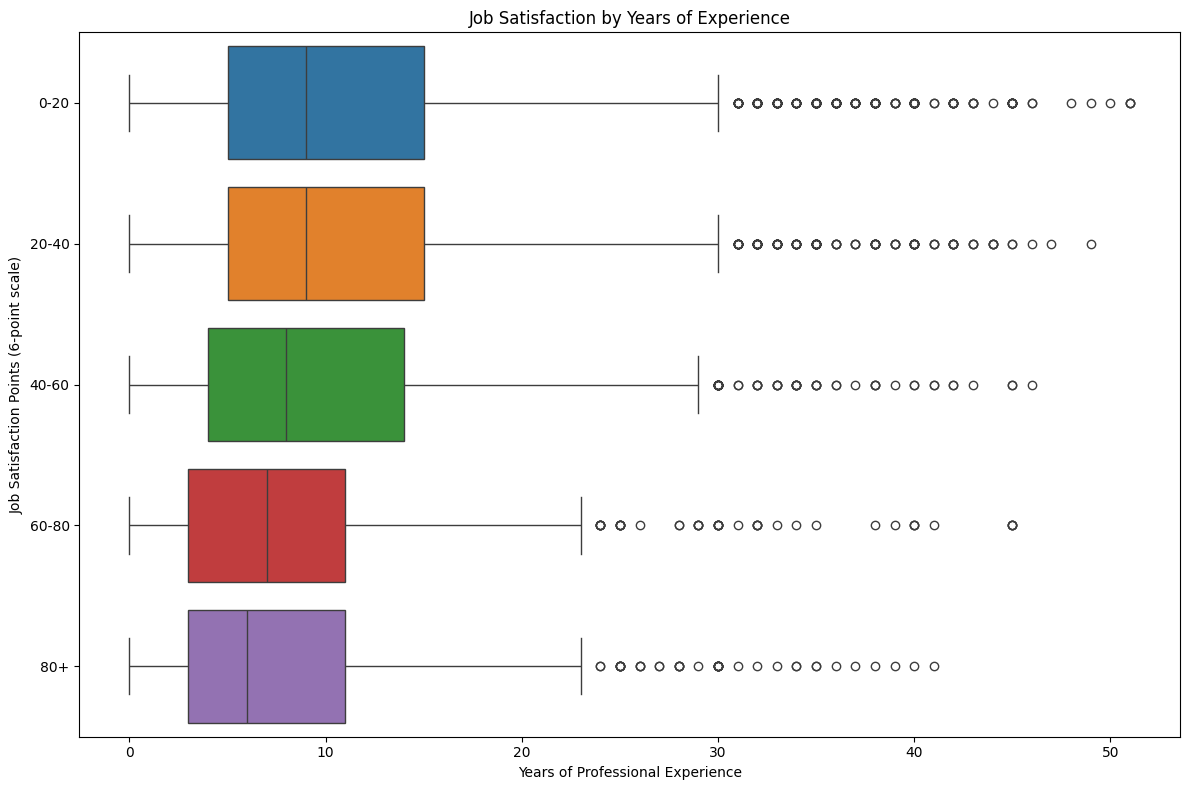

In [89]:
# your code goes here
df_job_sat_6 = df_comp_total[['YearsCodePro', 'JobSatPoints_6']].copy()
df_job_sat_6['JobSatPoints_6_bins'] = pd.cut(df_job_sat_6['JobSatPoints_6'], bins=[0, 20, 40, 60, 80, float('inf')], labels=['0-20', '20-40', '40-60', '60-80', '80+'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_job_sat_6, hue='JobSatPoints_6_bins',y='JobSatPoints_6_bins', x='YearsCodePro', vert=False)
plt.legend().remove()
plt.xlabel('Years of Professional Experience')
plt.ylabel('Job Satisfaction Points (6-point scale)')
plt.title('Job Satisfaction by Years of Experience')
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
